# Analysing StackOverflow Data

Created by: Sarah El Hindy and Sara Jakša

For this project, we are going to be analysing the data of answers and questions from the programming site StackOverflow.

The data was found on Kaggle: https://www.kaggle.com/stackoverflow/stacksample

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from collections import defaultdict
import statsmodels.formula.api as smf
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import math
import csv
%matplotlib inline

We are going to be researching only 7 languages, because these are the langauges that we are the most interested in. There are simply here because we will need them later on.

In [2]:
languages = ["c++", "c", "c#", "java", "python", "r", "lisp"]

## Average nb of answers to different Programming Language questions

Before analyzing the relation between the chosen programming languages and the MBTI personality type of the programmers, we are going to examine which programming language questions on Stack Overflow receive the most number of answers on average.

In [4]:
with open("Tags.csv", "r") as read:
    lines = read.readlines()
len(lines)

3750995

In [5]:
lines[:5]

['Id,Tag\n', '80,flex\n', '80,actionscript-3\n', '80,air\n', '90,svn\n']

In [6]:
questions_with_tags = defaultdict(set)

for line in lines[1:]:
    question, tag = line.strip().split(",")
    questions_with_tags[tag].add(question)
    
len(questions_with_tags)

37036

In [7]:
print(list(questions_with_tags.keys())[:20])

['fody-costura', 'server-configuration', 'authentication', 'uac', 'pywhois', 'winscp-net', 'progress-indicator', 'openstack-python-api', 'bearer-token', 'w2ui', 'dcm4che', 'firefox-webextensions', 'classcastexception', 'c++', 'hosts-file', 'xna-3.0', 'dynamics-nav-2013', 'httpsession', 'dasblog', 'solidcolorbrush']


### Java Questions:

In [9]:
java_questions = defaultdict(list)

In [10]:
with open("Java-Questions.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        print(line)
        break

['4080', '235', '2008-08-06T22:45:27Z', '2012-05-05T13:39:59Z', '92', 'What code analysis tools do you use for your Java projects?', "<p>What code analysis tools do you use on your Java projects?</p>\n\n<p>I am interested in all kinds</p>\n\n<ul>\n<li>static code analysis tools (FindBugs, PMD, and any others)</li>\n<li>code coverage tools (Cobertura, Emma, and any others)</li>\n<li>any other instrumentation-based tools </li>\n<li>anything else, if I'm missing something</li>\n</ul>\n\n<p>If applicable, also state what build tools you use and how well these tools integrate with both your IDEs and build tools. </p>\n\n<p>If a tool is only available a specific way (as an IDE plugin, or, say, a build tool plugin) that information is also worth noting.</p>\n"]


In [11]:
with open("Java-Questions.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["java"]:
            java_questions[line[0]].append(line[2])
            java_questions[line[0]].append(0)
            java_questions[line[0]].append(line[6])

In [12]:
with open("Java-Answers.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in java_questions:
            java_questions[line[3]][1] += 1

In [13]:
java_data = [(value[1], value[2]) for value in java_questions.values() if len(value) == 3]
#where value1 is id, and value 2 contains date,nb of answers and question
number_of_java_answers = [d[0] for d in java_data]
java_data = [d[1] for d in java_data]

number of answers for sample java question:

In [15]:
number_of_java_answers[10]

1

how long the answers for the java questions are (in chars):

In [16]:
length_java = [len(d) for d in java_data]

Average number of answers per java question:

In [17]:
total = 0
for value in number_of_java_answers:
    total += value

average_java = total/len(number_of_java_answers)
print(average_java)

1.7435076207339513


### C Questions:

In [18]:
c_questions = defaultdict(list)

In [19]:
with open("C-Questions2.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["c"]:
            c_questions[line[0]].append(line[2])
            c_questions[line[0]].append(0)
            c_questions[line[0]].append(line[6])

In [20]:
with open("C-Answers2.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in c_questions:
            c_questions[line[3]][1] += 1

In [23]:
c_data = [(value[1], value[2]) for value in c_questions.values() if len(value) == 3]
number_of_c_answers = [d[0] for d in c_data]

Average number of answers per C question:

In [24]:
total = 0
for value in number_of_c_answers:
    total += value

average_c = total/len(number_of_c_answers)
print(average_c)

2.1524657887942165


### C++ Questions:

In [25]:
c_plusplus_questions = defaultdict(list)

In [26]:
with open("C-Questions1.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["c++"]:
            c_plusplus_questions[line[0]].append(line[2])
            c_plusplus_questions[line[0]].append(0)
            c_plusplus_questions[line[0]].append(line[6])

In [27]:
with open("C-Answers1.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in c_plusplus_questions:
            c_plusplus_questions[line[3]][1] += 1

In [28]:
c_plusplus_data = [(value[1], value[2]) for value in c_plusplus_questions.values() if len(value) == 3]
number_of_c_plusplus_answers = [d[0] for d in c_plusplus_data]

Average number of answers per C++ question:

In [29]:
total = 0
for value in number_of_c_plusplus_answers:
    total += value

average_c_plusplus = total/len(number_of_c_plusplus_answers)
print(average_c_plusplus)

1.938643861234267


### C# Questions:

In [30]:
c_sharp_questions = defaultdict(list)

In [31]:
with open("C-Questions.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["c#"]:
            c_sharp_questions[line[0]].append(line[2])
            c_sharp_questions[line[0]].append(0)
            c_sharp_questions[line[0]].append(line[6])

In [32]:
with open("C-Answers.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in c_sharp_questions:
            c_sharp_questions[line[3]][1] += 1

In [33]:
c_sharp_data = [(value[1], value[2]) for value in c_sharp_questions.values() if len(value) == 3]
number_of_c_sharp_answers = [d[0] for d in c_sharp_data]

Average number of answers per C# question:

In [34]:
total = 0
for value in number_of_c_sharp_answers:
    total += value

average_c_sharp = total/len(number_of_c_sharp_answers)
print(average_c_sharp)

1.7812938548811101


### Python Questions:

In [35]:
python_questions = defaultdict(list)

In [36]:
with open("Python-Questions.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["python"]:
            python_questions[line[0]].append(line[2])
            python_questions[line[0]].append(0)
            python_questions[line[0]].append(line[6])

In [37]:
with open("Python-Answers.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in python_questions:
            python_questions[line[3]][1] += 1

In [38]:
python_data = [(value[1], value[2]) for value in python_questions.values() if len(value) == 3]
number_of_python_answers = [d[0] for d in python_data]

Average number of answers per Python question:

In [39]:
total = 0
for value in number_of_python_answers:
    total += value

average_python = total/len(number_of_python_answers)
print(average_python)

1.6285661212674727


### R Questions:

In [40]:
r_questions = defaultdict(list)

In [41]:
with open("R-Questions.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["r"]:
            r_questions[line[0]].append(line[2])
            r_questions[line[0]].append(0)
            r_questions[line[0]].append(line[6])

In [42]:
with open("R-Answers.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in r_questions:
            r_questions[line[3]][1] += 1

In [43]:
r_data = [(value[1], value[2]) for value in r_questions.values() if len(value) == 3]
number_of_r_answers = [d[0] for d in r_data]

Average number of answers per R question:

In [45]:
total = 0
for value in number_of_r_answers:
    total += value

average_r = total/len(number_of_r_answers)
print(average_r)

1.3371759760524808


### Lisp Questions:

In [47]:
lisp_questions = defaultdict(list)

In [48]:
with open("Lisp-Questions.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["lisp"]:
            lisp_questions[line[0]].append(line[2])
            lisp_questions[line[0]].append(0)
            lisp_questions[line[0]].append(line[6])

In [49]:
with open("Lisp-Answers.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in lisp_questions:
            lisp_questions[line[3]][1] += 1

In [50]:
lisp_data = [(value[1], value[2]) for value in lisp_questions.values() if len(value) == 3]
number_of_lisp_answers = [d[0] for d in lisp_data]

Average number of answers per Lisp question:

In [51]:
total = 0
for value in number_of_lisp_answers:
    total += value

average_lisp = total/len(number_of_lisp_answers)
print(average_lisp)

2.264830508474576


### Plotting Average Number of Answers per Programming Language

In [55]:
objects = ('Java', 'C', 'C++', 'C#', 'Python', 'R', 'Lisp')
performance = [average_java, average_c, average_c_plusplus, average_c_sharp, average_python, average_r, average_lisp]

In [56]:
data = pd.DataFrame(
    {'Languages': objects,
     'Avg Answers': performance,
    })

In [57]:
data = data.set_index("Languages")
data = data.sort_values(by="Avg Answers", ascending=False)

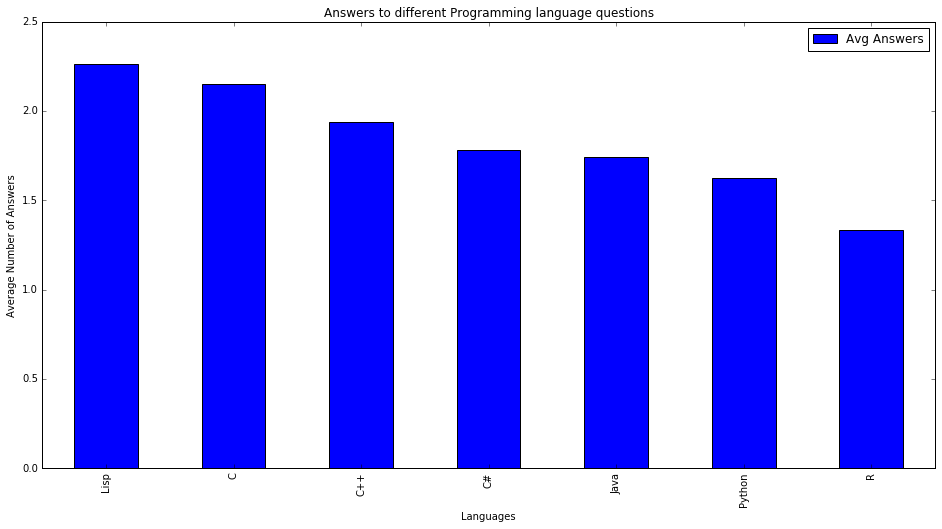

In [59]:
number_of_answers_plot = data.plot(kind="bar", title='Answers to different Programming language questions', figsize=(16,8))
number_of_answers_plot.set_ylabel("Average Number of Answers")

## Distribution of MBTI Types in Programming

In this part, we are going to analyze how different MBTI types are expressed in the StackOverflow site. 

For short description of the MBTI types you can go to: http://understandmyersbriggs.blogspot.co.at/p/description-of-8-letters.html or http://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/the-16-mbti-types.htm

If you want to test yourself, I prefer test on Dario Nardi's site: http://www.keys2cognition.com/explore.htm , but there is a short quiz http://www.blogthings.com/howrareisyourpersonalityquiz/

Next, to look into the MBTI types, we generated the csv data, where the first colum was the ID od the questions on the stackoverflow, the second one was the MBTI type and the third one was programming language that we got from tags used with the question.

In [3]:
with open("StackOverflow/MBTI-Questions.csv", "r") as read:
    questions_data = pd.read_csv(read, sep=",", header=None, names=["ID", "Type", "Language"])

In [4]:
questions_data.head()

,ID,Type,Language
0,467110,INTJ,r
1,520810,ESFJ,r
2,657440,ENTJ,r
3,1098210,ISTJ,r
4,1163640,INTJ,r


Now we are going to group this data based on their MBTI types. This way we will be able to see which types post more often on the Stackoverflow. 

If we assume that the distribution of the programmers is the same as the distribution of the people posting on Stackoverflow, we can also get which types more frequently decide to take programming. This is the assumption that we are going to be using in the following analysis.

In [5]:
types_all_questions = questions_data["Type"].value_counts()

As we can see from the graph below, types like ISTJ, ESFJ, INTJ and INTP are much more likely to program than other types. While ENFP and ENTP are less likely to program. 

This almost agree with the general notion in the MBTI community, where ISTJ, ISTP, INTJ and INTP are considered the types most likely to program. Not sure what the ESFJ is doing there, though. 

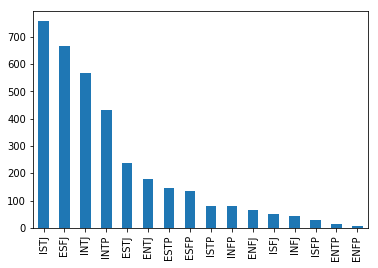

In [6]:
types_all_questions.plot(kind="bar")

## Distribution of Programming Langauges by Types

Next we are going to group data by the langauge use and create frequency table (programming langauge x MBTI type). 

For this we are going to first groups the data and collected all the data by specific language in the list. 

In [7]:
questions_grouped_by_language = questions_data.groupby("Language")

In [8]:
all_grouped_languages = []

In [9]:
for language in languages:
    group = questions_grouped_by_language.get_group(language)
    all_grouped_languages.append(group["Type"].value_counts())

Now we are going to put all these seperate data in one pandas data frame. 

In [10]:
type_languages_comparison = pd.concat(all_grouped_languages, axis=1)
type_languages_comparison.columns = languages
type_languages_comparison

,c++,c,c#,java,python,r,lisp
ENFJ,9.0,9,10.0,7.0,16,8.0,7
ENFP,NaN,1,NaN,NaN,3,NaN,2
ENTJ,26.0,22,29.0,30.0,24,29.0,21
ENTP,3.0,4,1.0,NaN,1,2.0,5
ESFJ,96.0,80,87.0,92.0,108,96.0,108
ESFP,15.0,18,23.0,23.0,13,25.0,19
ESTJ,41.0,28,40.0,53.0,24,28.0,25
ESTP,19.0,19,12.0,3.0,13,36.0,45
INFJ,4.0,3,7.0,11.0,9,2.0,9
INFP,11.0,10,10.0,16.0,6,15.0,13


As you can see above, we now have the data in the data frame. But there are some NaNs, where we had no data and the data is expressed in floats, even though they are count data and with that integers. So we are going to change NaNs to 0 and all the numbers to int type.

In [11]:
type_languages_comparison = type_languages_comparison.fillna(0)
type_languages_comparison = type_languages_comparison.astype(int)
type_languages_comparison

,c++,c,c#,java,python,r,lisp
ENFJ,9,9,10,7,16,8,7
ENFP,0,1,0,0,3,0,2
ENTJ,26,22,29,30,24,29,21
ENTP,3,4,1,0,1,2,5
ESFJ,96,80,87,92,108,96,108
ESFP,15,18,23,23,13,25,19
ESTJ,41,28,40,53,24,28,25
ESTP,19,19,12,3,13,36,45
INFJ,4,3,7,11,9,2,9
INFP,11,10,10,16,6,15,13


Now that we have the data in the right form, we can plot it to see if there are any differences. We can see for example, that INTJ types are more likely to use R, while ISTJ types are less likely to use it. Java is quite popular with ESTJs and ISTPs, but not with ESTPs, and so on. 

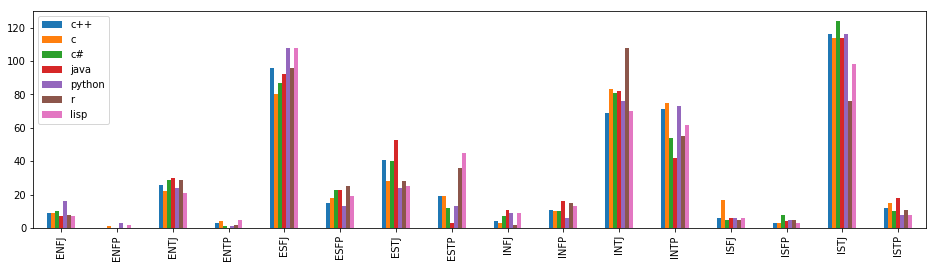

In [12]:
type_languages_comparison.plot(kind="bar", figsize=(16,4))

In order to see if there are also statistical differences in these langauges, we are going to be using chi-square method. 

The chi-square method from scipy outputs the chi2, p, degrees of freedom and expected frequencies.

In [13]:
chi2_questions, p_questions, dof_questions, res_questions = chi2_contingency(type_languages_comparison, correction=True)
chi2_questions, p_questions

(207.54972462959995, 2.8128161561126385e-11)

Considering the p is very low, we can conclude that they people's types influence the programing language that they are using.

Now we are going to make the expected frequency table more pretier, because we are going to be using it to calculate residuals.

In [14]:
res_questions = pd.DataFrame(res_questions).astype(float)
res_questions.columns = languages
res_questions.index = ["ENFJ", "ENFP", "ENTJ", "ENTP", "ESFJ", "ESFP", "ESTJ", "ESTP", "INFJ", "INFP", 
                       "INTJ", "INTP", "ISFJ", "ISFP", "ISTJ", "ISTP"]

Based on the Donald Sharpe's 2015 paper titled: Your Chi-Square Test is Statistically Significant: Now What? ( http://pareonline.net/getvn.asp?v=20&n=8 ), we calculated the standard residuals based on the following formula:

$residual = (observed - expected) \sqrt{expected}$


In [15]:
comparison_questions = (res_questions - type_languages_comparison.astype(float))/np.sqrt(type_languages_comparison.astype(float))

Here, we are defining the function, that will make it easier to locate the values that are actually different than the norm. Infinite value means we devided with 0, and that happened when we had no data, so this is yellow. Green combinations are the ones that are more likely, and red combinations are the ones that are less likely. 

2 is just an arbitraty number. 1 produced too many colred values, so I used 2. 

In [16]:
def color_negative_red(number):
    if number == math.inf:
        color = "yellow"
    elif number < -2:
        color = "green"
    elif number > 2:
        color = "red"
    else:
        color = "white"
    return 'background-color: %s' % color

In [17]:
comparison_questions.style.applymap(color_negative_red)

## Distribution of Types by Programming Langauges

### Whole Types

Next we are going to check, if there are any differences within the langauge. For this, we will first calculate the frequency of the language used by type. 

In [18]:
type_languages_comparison["sum"] = type_languages_comparison.sum(axis=1)
for lang in languages:
    type_languages_comparison[lang] = type_languages_comparison[lang]/type_languages_comparison["sum"]
del type_languages_comparison["sum"]

In [19]:
type_languages_comparison = type_languages_comparison.T

In [20]:
type_languages_comparison

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
c++,0.136364,0.000000,0.143646,0.1875,0.143928,0.110294,0.171548,0.129252,0.088889,0.135802,0.121265,0.164352,0.117647,0.096774,0.153034,0.146341
c,0.136364,0.166667,0.121547,0.2500,0.119940,0.132353,0.117155,0.129252,0.066667,0.123457,0.145870,0.173611,0.333333,0.096774,0.150396,0.182927
c#,0.151515,0.000000,0.160221,0.0625,0.130435,0.169118,0.167364,0.081633,0.155556,0.123457,0.142355,0.125000,0.098039,0.258065,0.163588,0.121951
java,0.106061,0.000000,0.165746,0.0000,0.137931,0.169118,0.221757,0.020408,0.244444,0.197531,0.144112,0.097222,0.117647,0.129032,0.150396,0.219512
python,0.242424,0.500000,0.132597,0.0625,0.161919,0.095588,0.100418,0.088435,0.200000,0.074074,0.133568,0.168981,0.117647,0.161290,0.153034,0.097561
r,0.121212,0.000000,0.160221,0.1250,0.143928,0.183824,0.117155,0.244898,0.044444,0.185185,0.189807,0.127315,0.098039,0.161290,0.100264,0.134146
lisp,0.106061,0.333333,0.116022,0.3125,0.161919,0.139706,0.104603,0.306122,0.200000,0.160494,0.123023,0.143519,0.117647,0.096774,0.129288,0.097561


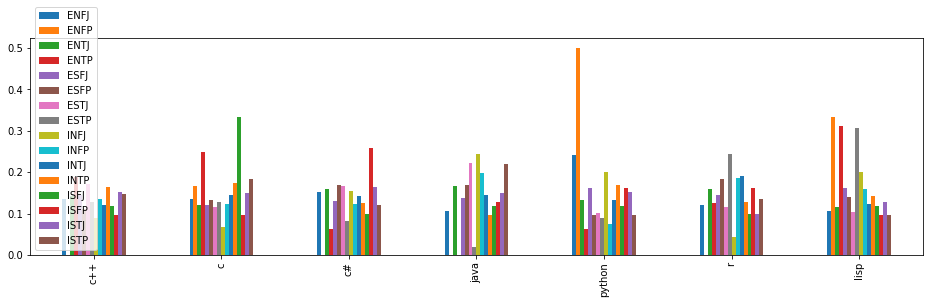

In [21]:
type_languages_comparison.plot(kind="bar", figsize=(16,4))

As you can see on the graph above, there are some things that stand out. For example, most of the ENFPs that program are programming in Python. But Python is not really popular with the ENTPs and INFPs. 
Java, I think, is also interesting, because it had multiple type, where there seems to be the lack of people using it. For example ENFPs, ENTPs and ESTPs. 

Since there are 16 type, so it is hard to take all this information in, we are going to be analyzing this data by the facets of the personality. 

### Extraversion vs. Introversion

First is the Extraversion vs. Introversion facet. 

In [22]:
type_languages_comparison_EI = pd.DataFrame()

In [23]:
type_languages_comparison_EI["I"] = type_languages_comparison["ISTP"] + \
                                 type_languages_comparison["ISTJ"] + \
                                 type_languages_comparison["ISFP"] + \
                                 type_languages_comparison["ISFJ"] + \
                                 type_languages_comparison["INTP"] + \
                                 type_languages_comparison["INTJ"] + \
                                 type_languages_comparison["INFP"] + \
                                 type_languages_comparison["INFJ"]

In [24]:
type_languages_comparison_EI["E"] = type_languages_comparison["ESTP"] + \
                                 type_languages_comparison["ESTJ"] + \
                                 type_languages_comparison["ESFP"] + \
                                 type_languages_comparison["ESFJ"] + \
                                 type_languages_comparison["ENTP"] + \
                                 type_languages_comparison["ENTJ"] + \
                                 type_languages_comparison["ENFP"] + \
                                 type_languages_comparison["ENFJ"]

In [25]:
type_languages_comparison_EI = type_languages_comparison_EI.T

In [26]:
type_languages_comparison_EI["sum"] = type_languages_comparison_EI.sum(axis=1)
for lang in languages:
    type_languages_comparison_EI[lang] = type_languages_comparison_EI[lang]/type_languages_comparison_EI["sum"]
del type_languages_comparison_EI["sum"]

In [27]:
type_languages_comparison_EI

,c++,c,c#,java,python,r,lisp
I,0.128013,0.159129,0.148501,0.162487,0.138269,0.130061,0.133538
E,0.127817,0.146660,0.115348,0.102628,0.172985,0.137030,0.197533


In [28]:
type_languages_comparison_EI = type_languages_comparison_EI.T

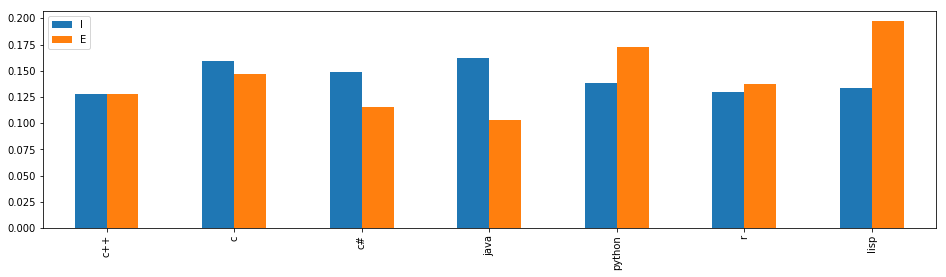

In [29]:
type_languages_comparison_EI.plot(kind="bar", figsize=(16,4))

It seems that for this facet, the extroverts prefer the langauges like Lisp and Python. The introverts, on the other hand, prefer languages like Java and C#.

### Sensing vs. Intuition

Next is the compariosn between Sensing and iNtuition.

In [30]:
type_languages_comparison_SN = pd.DataFrame()

In [31]:
type_languages_comparison_SN["N"] = type_languages_comparison["ENTP"] + \
                                    type_languages_comparison["ENTJ"] + \
                                    type_languages_comparison["ENFP"] + \
                                    type_languages_comparison["ENFJ"] + \
                                    type_languages_comparison["INTP"] + \
                                    type_languages_comparison["INTJ"] + \
                                    type_languages_comparison["INFP"] + \
                                    type_languages_comparison["INFJ"]

In [32]:
type_languages_comparison_SN["S"] = type_languages_comparison["ESTP"] + \
                                    type_languages_comparison["ESTJ"] + \
                                    type_languages_comparison["ESFP"] + \
                                    type_languages_comparison["ESFJ"] + \
                                    type_languages_comparison["ISTP"] + \
                                    type_languages_comparison["ISTJ"] + \
                                    type_languages_comparison["ISFP"] + \
                                    type_languages_comparison["ISFJ"]

In [33]:
type_languages_comparison_SN = type_languages_comparison_SN.T
type_languages_comparison_SN["sum"] = type_languages_comparison_SN.sum(axis=1)
for lang in languages:
    type_languages_comparison_SN[lang] = type_languages_comparison_SN[lang]/type_languages_comparison_SN["sum"]
del type_languages_comparison_SN["sum"]
type_languages_comparison_SN = type_languages_comparison_SN.T

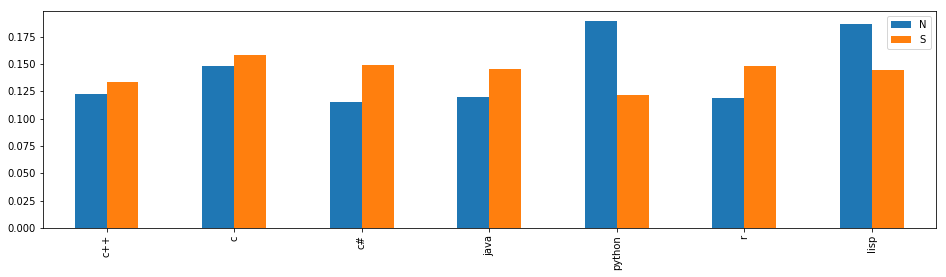

In [34]:
type_languages_comparison_SN.plot(kind="bar", figsize=(16,4))

Here the trend is quite similar to the one above. The Python and Lisp are grouped together again, faovrited by intuitives, and so are C# and Java, favorited by sensers.

### Thinking vs. Feeling

Next is the comparison between thinking and feeling. 

In [35]:
type_languages_comparison_TF = pd.DataFrame()

In [36]:
type_languages_comparison_TF["F"] = type_languages_comparison["ESFP"] + \
                                    type_languages_comparison["ESFJ"] + \
                                    type_languages_comparison["ENFP"] + \
                                    type_languages_comparison["ENFJ"] + \
                                    type_languages_comparison["ISFP"] + \
                                    type_languages_comparison["ISFJ"] + \
                                    type_languages_comparison["INFP"] + \
                                    type_languages_comparison["INFJ"]

In [37]:
type_languages_comparison_TF["T"] = type_languages_comparison["ESTP"] + \
                                    type_languages_comparison["ESTJ"] + \
                                    type_languages_comparison["ENTP"] + \
                                    type_languages_comparison["ENTJ"] + \
                                    type_languages_comparison["ISTP"] + \
                                    type_languages_comparison["ISTJ"] + \
                                    type_languages_comparison["INTP"] + \
                                    type_languages_comparison["INTJ"]

In [38]:
type_languages_comparison_TF = type_languages_comparison_TF.T
type_languages_comparison_TF["sum"] = type_languages_comparison_TF.sum(axis=1)
for lang in languages:
    type_languages_comparison_TF[lang] = type_languages_comparison_TF[lang]/type_languages_comparison_TF["sum"]
del type_languages_comparison_TF["sum"]
type_languages_comparison_TF = type_languages_comparison_TF.T

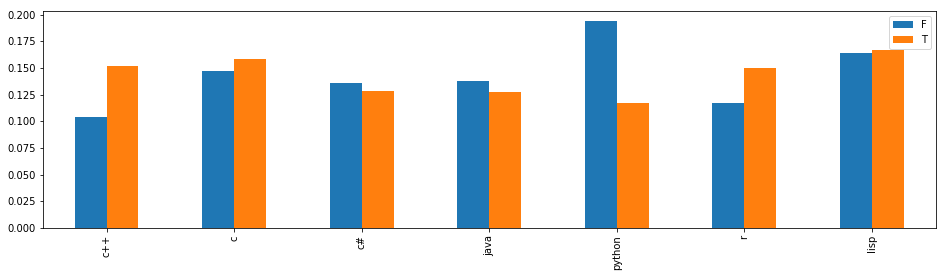

In [39]:
type_languages_comparison_TF.plot(kind="bar", figsize=(16,4))

Here the grouping seems to work a bit differently. Feelers seems to prefer the Python, and thinkers seems tp prefer C++ and R.

### Judging vs. Perciving

And the next analysis is Judging vs. Perciving.

In [40]:
type_languages_comparison_JP = pd.DataFrame()

In [41]:
type_languages_comparison_JP["P"] = type_languages_comparison["ESFP"] + \
                                    type_languages_comparison["ESTP"] + \
                                    type_languages_comparison["ENFP"] + \
                                    type_languages_comparison["ENTP"] + \
                                    type_languages_comparison["ISFP"] + \
                                    type_languages_comparison["ISTP"] + \
                                    type_languages_comparison["INFP"] + \
                                    type_languages_comparison["INTP"]

In [42]:
type_languages_comparison_JP["J"] = type_languages_comparison["ESFJ"] + \
                                    type_languages_comparison["ESTJ"] + \
                                    type_languages_comparison["ENFJ"] + \
                                    type_languages_comparison["ENTJ"] + \
                                    type_languages_comparison["ISFJ"] + \
                                    type_languages_comparison["ISTJ"] + \
                                    type_languages_comparison["INFJ"] + \
                                    type_languages_comparison["INTJ"]

In [43]:
type_languages_comparison_JP = type_languages_comparison_JP.T
type_languages_comparison_JP["sum"] = type_languages_comparison_JP.sum(axis=1)
for lang in languages:
    type_languages_comparison_JP[lang] = type_languages_comparison_JP[lang]/type_languages_comparison_JP["sum"]
del type_languages_comparison_JP["sum"]
type_languages_comparison_JP = type_languages_comparison_JP.T

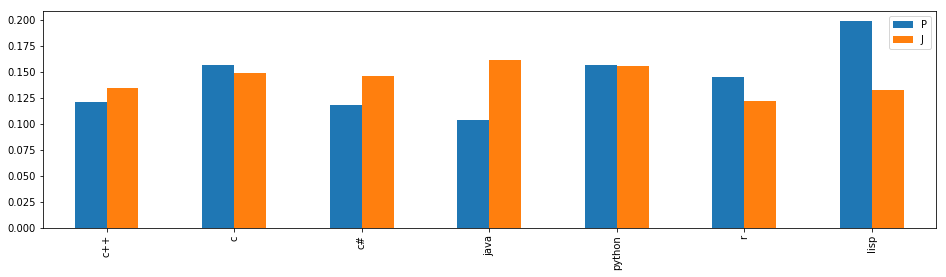

In [44]:
type_languages_comparison_JP.plot(kind="bar", figsize=(16,4))

Here we are almost back to the original groups. This time C# and Java are favorited by judgers and Lisp is favorited by percivers. 

### Primary Function

Next we are going to analyse the same data with the function perspective. Unlike the MBTI theory, this one relates to the original Jung's theory. But there is a direct translation between types in the both theories.

In [45]:
type_languages_comparison_F = pd.DataFrame()

In [46]:
type_languages_comparison_F["Ti"] = type_languages_comparison["INTP"] + type_languages_comparison["ISTP"]

In [47]:
type_languages_comparison_F["Te"] = type_languages_comparison["ENTJ"] + type_languages_comparison["ESTJ"]

In [48]:
type_languages_comparison_F["Fi"] = type_languages_comparison["INFP"] + type_languages_comparison["ISFP"]

In [49]:
type_languages_comparison_F["Fe"] = type_languages_comparison["ENFJ"] + type_languages_comparison["ESFJ"]

In [50]:
type_languages_comparison_F["Ni"] = type_languages_comparison["INFJ"] + type_languages_comparison["INTJ"]

In [51]:
type_languages_comparison_F["Ne"] = type_languages_comparison["ENTP"] + type_languages_comparison["ENFP"]

In [52]:
type_languages_comparison_F["Si"] = type_languages_comparison["ISTJ"] + type_languages_comparison["ISFJ"]

In [53]:
type_languages_comparison_F["Se"] = type_languages_comparison["ESTP"] + type_languages_comparison["ESFP"]

In [54]:
type_languages_comparison_F = type_languages_comparison_F.T
type_languages_comparison_F["sum"] = type_languages_comparison_F.sum(axis=1)
for lang in languages:
    type_languages_comparison_F[lang] = type_languages_comparison_F[lang]/type_languages_comparison_F["sum"]
del type_languages_comparison_F["sum"]
type_languages_comparison_F = type_languages_comparison_F.T

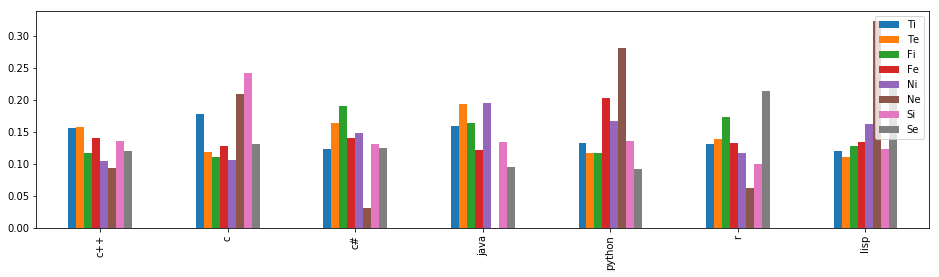

In [55]:
type_languages_comparison_F.plot(kind="bar", figsize=(16,4))

Here we can see some interesting things. For example, the Ne function seems atracted to the languages like Python and Lisp, but there is a big lack of them in R, Java, and C#. Se function seems to be a bit more atracted the the R and Lisp. 

### Judging Functions

The next two are from the function perspective as well, but instead of the strongest function is simply analysing all the people that use the function.

In [56]:
type_languages_comparison_J = pd.DataFrame()

In [57]:
type_languages_comparison_J["Ti"] = type_languages_comparison["INTP"] + type_languages_comparison["ISTP"] + \
                                    type_languages_comparison["ENTP"] + type_languages_comparison["ESTP"]

In [58]:
type_languages_comparison_J["Te"] = type_languages_comparison["INTJ"] + type_languages_comparison["ISTJ"] + \
                                    type_languages_comparison["ENTJ"] + type_languages_comparison["ESTJ"]

In [59]:
type_languages_comparison_J["Fe"] = type_languages_comparison["INFJ"] + type_languages_comparison["ISFJ"] + \
                                    type_languages_comparison["ENFJ"] + type_languages_comparison["ESFJ"]

In [60]:
type_languages_comparison_J["Fi"] = type_languages_comparison["INFP"] + type_languages_comparison["ISFP"] + \
                                    type_languages_comparison["ENFP"] + type_languages_comparison["ESFP"]

In [61]:
type_languages_comparison_J = type_languages_comparison_J.T
type_languages_comparison_J["sum"] = type_languages_comparison_J.sum(axis=1)
for lang in languages:
    type_languages_comparison_J[lang] = type_languages_comparison_J[lang]/type_languages_comparison_J["sum"]
del type_languages_comparison_J["sum"]
type_languages_comparison_J = type_languages_comparison_J.T

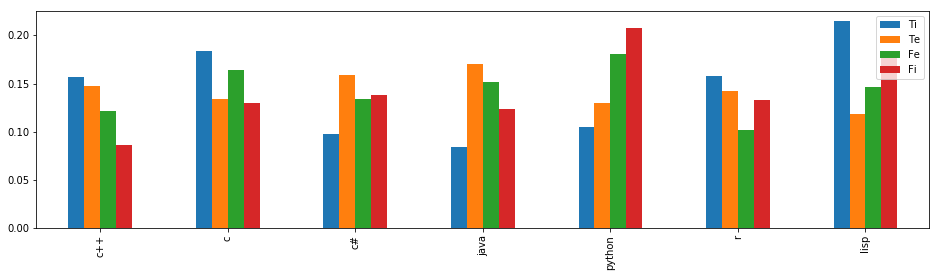

In [62]:
type_languages_comparison_J.plot(kind="bar", figsize=(16,4))

I wonder what this means for the communities of these langauges. For example Te (orange) are known as being efficient and organized, and this influence seems strongest with C# and Java. Ti (blue) are problem solvers, strongest with R, Lisp, C++ and C. And Fi (red) are concerned about morals, and this influence seems strongest with Python. Fe (green) are known at being the social glue and keeping the community togehter, but they don't seem to be the strongest anywhere.

### Perciving Functions

In [63]:
type_languages_comparison_P = pd.DataFrame()

In [64]:
type_languages_comparison_P["Se"] = type_languages_comparison["ISFP"] + type_languages_comparison["ISTP"] + \
                                    type_languages_comparison["ESFP"] + type_languages_comparison["ESTP"]

In [65]:
type_languages_comparison_P["Ne"] = type_languages_comparison["INFP"] + type_languages_comparison["INTP"] + \
                                    type_languages_comparison["ENFP"] + type_languages_comparison["ENTP"]

In [66]:
type_languages_comparison_P["Ni"] = type_languages_comparison["INFJ"] + type_languages_comparison["INTJ"] + \
                                    type_languages_comparison["ENFJ"] + type_languages_comparison["ENTJ"]

In [67]:
type_languages_comparison_P["Si"] = type_languages_comparison["ISFJ"] + type_languages_comparison["ISTJ"] + \
                                    type_languages_comparison["ESFJ"] + type_languages_comparison["ESTJ"]

In [68]:
type_languages_comparison_P = type_languages_comparison_P.T
type_languages_comparison_P["sum"] = type_languages_comparison_P.sum(axis=1)
for lang in languages:
    type_languages_comparison_P[lang] = type_languages_comparison_P[lang]/type_languages_comparison_P["sum"]
del type_languages_comparison_P["sum"]
type_languages_comparison_P = type_languages_comparison_P.T

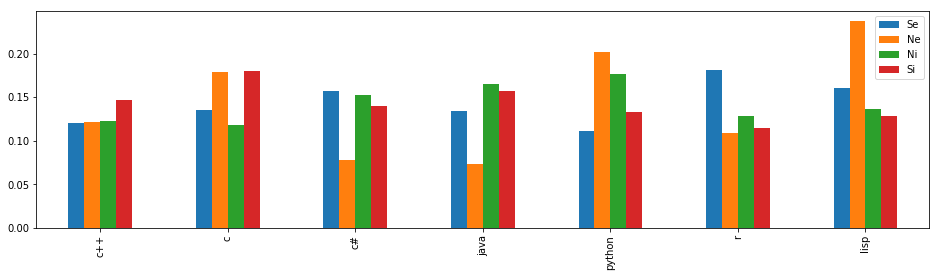

In [69]:
type_languages_comparison_P.plot(kind="bar", figsize=(16,4))

Here we are simply seeing the similar picture that we already saw before. But let me try to explain it.

First thing to know is that these functions represent what people are paying attention to, what they are seeking. The Se types (blue) prefer the new experiences, Ne (orange) prefer broad knowladge and new ideas, Ni (green) prefer the deep understanding of the topic and Si (red) prefer to find the best way to do something and stick with it.

In this plot, most of the functions are relativly balanced. The only thing is Ne, which is higher in Lisp and maybe Python, and lower in C# and Java. I wonder if that means that C# and Java are traditional choices and Python and Lisp are the oposite of that?

## Distribution of Answers by Types

Next we are going to be analyzing the answers of the StackOverflow.

First we are going to load the data, that was prepared. I added the langauge tag, MBTI type of the Answer and the Question to it beforehand.

In [70]:
with open("StackOverflow/Answers-MBTI.csv", "r") as read:
    answer_data = pd.read_csv(read, sep=",")

In [71]:
answer_data.head()

,Unnamed: 0,Id,OwnerUserId,CreationDate,ParentId,Score,Body,Language,QuestionsMBTI,AnswerMBTI
0,0,269,91.0,2008-08-01T23:49:57Z,260,4,"Yes, I thought about that, but I soon figured ...",c#,ISTJ,ESFJ
1,1,307,49.0,2008-08-02T01:49:46Z,260,28,Oleg Shilo's C# Script solution (at The Code P...,c#,ISTJ,INTJ
2,2,344,100.0,2008-08-02T04:18:15Z,260,6,You might be able to use IronRuby for that. \n...,c#,ISTJ,INFP
3,3,359,119.0,2008-08-02T06:16:23Z,260,5,"You could use any of the DLR languages, which ...",c#,ISTJ,INTJ
4,4,3637,541.0,2008-08-06T16:28:19Z,260,5,If you don't want to use the DLR you can use B...,c#,ISTJ,INTJ


Let us first compare which people are answering the questions. So we are going to group the data by the MBTI type.

In [72]:
types_all_answers = answer_data["AnswerMBTI"].value_counts()

If we compare the following graph with the one based on the questions, there are some small differences in ranking. But in most cases, it is between the types that have similar number of questions or answers posted. For example, between ESFP and ESTP.

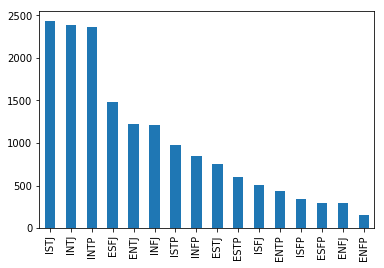

In [73]:
types_all_answers.plot(kind="bar")

## Scores by Languages and Types

In [74]:
### Distribution of Scores

Next we are going to be analysing the score of the answers. First we are going to see the distribution of different scores. 

In [75]:
del answer_data["Unnamed: 0"]
answer_data = answer_data.set_index("Id")

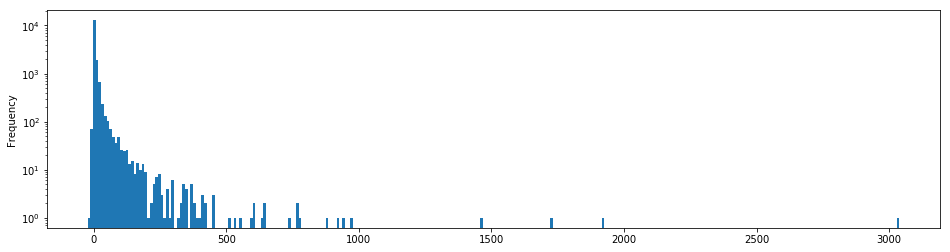

In [76]:
answer_data["Score"].plot.hist(log=True, bins=300, figsize=(16,4))

As we can see, the distribution has a long tail. Let us see which answers have the highest score. 

In [77]:
answer_data.sort("Score", ascending=False).head()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,OwnerUserId,CreationDate,ParentId,Score,Body,Language,QuestionsMBTI,AnswerMBTI
Id,,,,,,,,
40523,4192.0,2008-09-02T20:25:37Z,40480,3038,"Java is always pass-by-value. Unfortunately, t...",java,ESFJ,INFJ
73021,12541.0,2008-09-16T14:37:00Z,40480,1922,I just noticed you referenced my article.\nThe...,java,ESFJ,ISTJ
332086,16855.0,2008-12-01T20:26:41Z,332030,1730,static_cast is the first cast you should attem...,c++,ESTJ,ESTJ
306417,5821.0,2008-11-20T18:46:39Z,306400,1462,Use random.choice:\nimport random\n\nfoo = ['a...,python,ISTJ,ESTP
541394,17160.0,2009-02-12T14:12:46Z,541390,970,Yes. Use os.path.splitext:\n>>> import os\n>>>...,python,ESTP,ENTJ


### Scores by Langauge and Type

Next we are going to see the avrage score seperated based on type of the person answering and the langauge. 

In [78]:
answer_data_grouped = answer_data.groupby(['Language', 'AnswerMBTI'], as_index=False)["Score"].mean()

In [79]:
answer_data_grouped = answer_data_grouped.pivot(index='Language', columns='AnswerMBTI', values='Score')

In [80]:
answer_data_grouped

AnswerMBTI,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Language,,,,,,,,,,,,,,,,
c,4.393443,6.730769,7.982659,10.781250,5.346341,16.142857,7.811475,3.800000,7.055556,8.625850,10.002105,7.078818,8.526786,3.677419,5.736715,5.972414
c#,5.589286,6.176471,10.269076,8.623188,10.251381,16.117647,8.664179,8.262626,12.169312,9.297710,16.413462,11.449339,9.354167,9.263158,8.176904,9.313131
c++,7.423077,9.766667,6.255000,4.819672,5.516129,18.902439,21.652778,4.460674,8.497674,7.850000,15.241164,8.705882,11.939655,4.016667,7.235417,8.406250
java,2.578947,1.500000,7.155251,12.776316,9.509158,18.790323,11.987013,5.383562,21.063725,8.168605,13.613445,7.924242,10.083333,2.937500,15.299754,9.593301
lisp,4.000000,3.666667,3.541667,3.863636,2.710145,4.473684,3.372093,4.546875,4.014706,2.096154,6.682692,4.005291,2.782609,4.277778,3.520270,3.576271
python,9.225000,18.263158,17.658768,15.654545,15.004000,6.857143,12.166667,28.758929,11.361386,9.719178,10.185430,14.940594,11.443038,4.783784,10.966480,8.183673
r,7.300000,5.846154,6.736842,8.409836,10.886076,3.916667,9.288136,6.486486,5.910891,6.935484,9.520548,7.291005,5.468750,4.315789,6.552036,5.351852


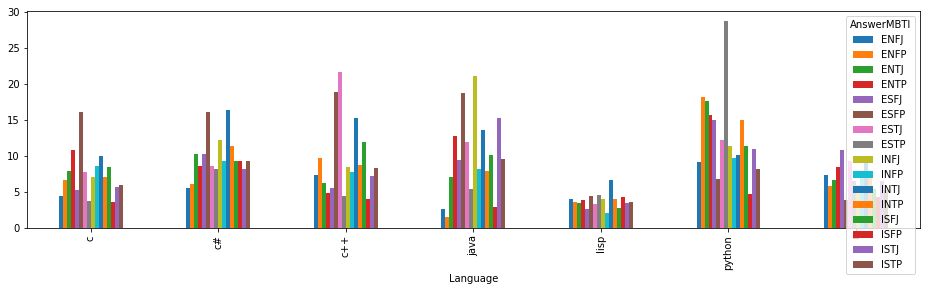

In [81]:
answer_data_grouped.plot(kind="bar", figsize=(16,4))

We can see here, that there might be something interesting there. For example, the ESTPs get quite a high avreage score in Python. Also INFJs and ESFPs seems to get quite a high score for Java. On the other hand, ENFPs and ENFJs are really bad in answering questions about Java. 

## Extroversion vs. Introversion

In [82]:
answer_data_summed = answer_data.groupby(['Language', 'AnswerMBTI'], as_index=False)["Score"].sum()
answer_data_summed = answer_data_summed.pivot(index='Language', columns='AnswerMBTI', values='Score')

In [83]:
answer_data_count = answer_data.groupby(['Language', 'AnswerMBTI'], as_index=False)["Score"].count()
answer_data_count = answer_data_count.pivot(index='Language', columns='AnswerMBTI', values='Score')

In [84]:
answer_data_count

AnswerMBTI,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Language,,,,,,,,,,,,,,,,
c,61,26,173,64,205,49,122,85,234,147,475,406,112,62,414,145
c#,56,34,249,69,362,51,134,99,189,131,416,454,96,57,407,198
c++,52,30,200,61,248,41,144,89,215,140,481,425,116,60,480,160
java,57,14,219,76,273,62,154,73,204,172,357,396,48,48,407,209
lisp,14,6,72,44,69,19,43,64,68,52,208,189,23,18,148,59
python,40,19,211,55,250,42,102,112,202,146,302,303,79,74,358,147
r,10,26,95,61,79,36,59,74,101,62,146,189,32,19,221,54


In [85]:
answer_data_summed

AnswerMBTI,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Language,,,,,,,,,,,,,,,,
c,268,175,1381,690,1096,791,953,323,1651,1268,4751,2874,955,228,2375,866
c#,313,210,2557,595,3711,822,1161,818,2300,1218,6828,5198,898,528,3328,1844
c++,386,293,1251,294,1368,775,3118,397,1827,1099,7331,3700,1385,241,3473,1345
java,147,21,1567,971,2596,1165,1846,393,4297,1405,4860,3138,484,141,6227,2005
lisp,56,22,255,170,187,85,145,291,273,109,1390,757,64,77,521,211
python,369,347,3726,861,3751,288,1241,3221,2295,1419,3076,4527,904,354,3926,1203
r,73,152,640,513,860,141,548,480,597,430,1390,1378,175,82,1448,289


In [86]:
answer_comparison_EI = pd.DataFrame()

In [87]:
answer_comparison_EI["ISum"] = answer_data_summed["ISTP"] + \
                            answer_data_summed["ISTJ"] + \
                            answer_data_summed["ISFP"] + \
                            answer_data_summed["ISFJ"] + \
                            answer_data_summed["INTP"] + \
                            answer_data_summed["INTJ"] + \
                            answer_data_summed["INFP"] + \
                            answer_data_summed["INFJ"]

In [88]:
answer_comparison_EI["ICount"] = answer_data_count["ISTP"] + \
                            answer_data_count["ISTJ"] + \
                            answer_data_count["ISFP"] + \
                            answer_data_count["ISFJ"] + \
                            answer_data_count["INTP"] + \
                            answer_data_count["INTJ"] + \
                            answer_data_count["INFP"] + \
                            answer_data_count["INFJ"]

In [89]:
answer_comparison_EI["ECount"] = answer_data_count["ESTP"] + \
                            answer_data_count["ESTJ"] + \
                            answer_data_count["ESFP"] + \
                            answer_data_count["ESFJ"] + \
                            answer_data_count["ENTP"] + \
                            answer_data_count["ENTJ"] + \
                            answer_data_count["ENFP"] + \
                            answer_data_count["ENFJ"]

In [90]:
answer_comparison_EI["ESum"] = answer_data_summed["ESTP"] + \
                            answer_data_summed["ESTJ"] + \
                            answer_data_summed["ESFP"] + \
                            answer_data_summed["ESFJ"] + \
                            answer_data_summed["ENTP"] + \
                            answer_data_summed["ENTJ"] + \
                            answer_data_summed["ENFP"] + \
                            answer_data_summed["ENFJ"]

In [91]:
answer_comparison_EI

,ISum,ICount,ECount,ESum
Language,,,,
c,14968,1995,785,5677
c#,22142,1948,1054,10187
c++,20401,2077,865,7882
java,22557,1841,928,8706
lisp,3402,765,331,1211
python,17704,1611,831,13804
r,5789,824,440,3407


In [92]:
answer_comparison_EI["I"] = answer_comparison_EI["ISum"] / answer_comparison_EI["ICount"]
answer_comparison_EI["E"] = answer_comparison_EI["ESum"] / answer_comparison_EI["ECount"]

In [93]:
del answer_comparison_EI["ISum"]
del answer_comparison_EI["ESum"]
del answer_comparison_EI["ICount"]
del answer_comparison_EI["ECount"]

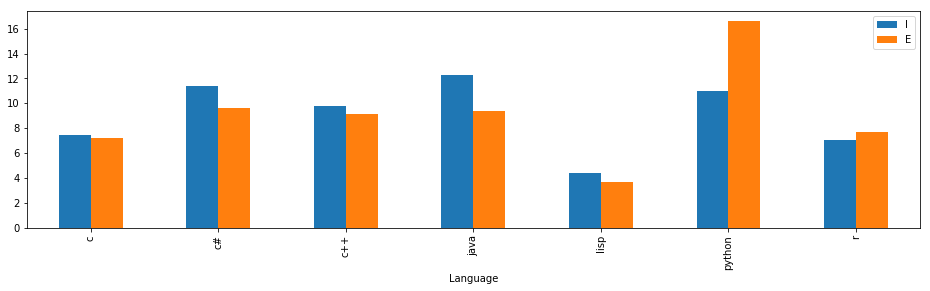

In [94]:
answer_comparison_EI.plot(kind="bar", figsize=(16,4))

We can see that there is a big difference when we look at the Python language. For some reason, the Python extroverts seems to be a lot better at answering questions on avreage than the introverts. In Java, the effect is a reverse, but it seems to be smaller.

### Sensation vs. Intuition

In [95]:
answer_comparison_SN = pd.DataFrame()

In [96]:
answer_comparison_SN["NSum"] = answer_data_summed["ENTP"] + \
                            answer_data_summed["ENTJ"] + \
                            answer_data_summed["ENFP"] + \
                            answer_data_summed["ENFJ"] + \
                            answer_data_summed["INTP"] + \
                            answer_data_summed["INTJ"] + \
                            answer_data_summed["INFP"] + \
                            answer_data_summed["INFJ"]

In [97]:
answer_comparison_SN["SSum"] = answer_data_summed["ESTP"] + \
                            answer_data_summed["ESTJ"] + \
                            answer_data_summed["ESFP"] + \
                            answer_data_summed["ESFJ"] + \
                            answer_data_summed["ISTP"] + \
                            answer_data_summed["ISTJ"] + \
                            answer_data_summed["ISFP"] + \
                            answer_data_summed["ISFJ"]

In [98]:
answer_comparison_SN["NCount"] = answer_data_count["ENTP"] + \
                            answer_data_count["ENTJ"] + \
                            answer_data_count["ENFP"] + \
                            answer_data_count["ENFJ"] + \
                            answer_data_count["INTP"] + \
                            answer_data_count["INTJ"] + \
                            answer_data_count["INFP"] + \
                            answer_data_count["INFJ"]

In [99]:
answer_comparison_SN["SCount"] = answer_data_count["ESTP"] + \
                            answer_data_count["ESTJ"] + \
                            answer_data_count["ESFP"] + \
                            answer_data_count["ESFJ"] + \
                            answer_data_count["ISTP"] + \
                            answer_data_count["ISTJ"] + \
                            answer_data_count["ISFP"] + \
                            answer_data_count["ISFJ"]

In [100]:
answer_comparison_SN["S"] = answer_comparison_SN["SSum"] / answer_comparison_SN["SCount"]
answer_comparison_SN["N"] = answer_comparison_SN["NSum"] / answer_comparison_SN["NCount"]

In [101]:
del answer_comparison_SN["SSum"]
del answer_comparison_SN["NSum"]
del answer_comparison_SN["SCount"]
del answer_comparison_SN["NCount"]

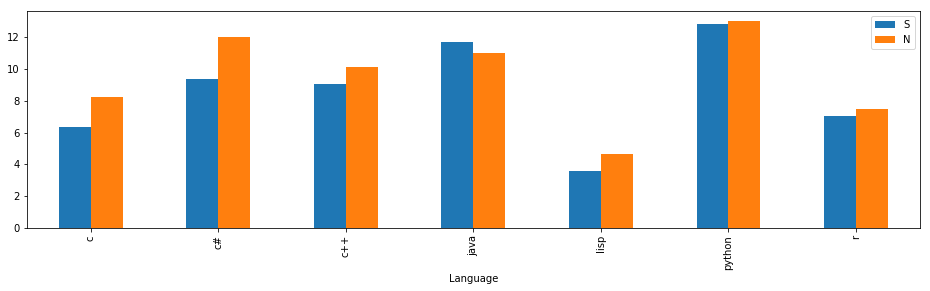

In [102]:
answer_comparison_SN.plot(kind="bar", figsize=(16,4))

Here we see some indcation the intuitives are better at answering questions for C# and C. Maybe for Lisp. The other seems quite more balanced. 

### Thinking vs. Feeling

In [103]:
answer_comparison_TF = pd.DataFrame()

In [104]:
answer_comparison_TF["FSum"] = answer_data_summed["ESFP"] + \
                            answer_data_summed["ESFJ"] + \
                            answer_data_summed["ENFP"] + \
                            answer_data_summed["ENFJ"] + \
                            answer_data_summed["ISFP"] + \
                            answer_data_summed["ISFJ"] + \
                            answer_data_summed["INFP"] + \
                            answer_data_summed["INFJ"]

In [105]:
answer_comparison_TF["TSum"] = answer_data_summed["ESTP"] + \
                            answer_data_summed["ESTJ"] + \
                            answer_data_summed["ENTP"] + \
                            answer_data_summed["ENTJ"] + \
                            answer_data_summed["ISTP"] + \
                            answer_data_summed["ISTJ"] + \
                            answer_data_summed["INTP"] + \
                            answer_data_summed["INTJ"]

In [106]:
answer_comparison_TF["FCount"] = answer_data_count["ESFP"] + \
                            answer_data_count["ESFJ"] + \
                            answer_data_count["ENFP"] + \
                            answer_data_count["ENFJ"] + \
                            answer_data_count["ISFP"] + \
                            answer_data_count["ISFJ"] + \
                            answer_data_count["INFP"] + \
                            answer_data_count["INFJ"]

In [107]:
answer_comparison_TF["TCount"] = answer_data_count["ESTP"] + \
                            answer_data_count["ESTJ"] + \
                            answer_data_count["ENTP"] + \
                            answer_data_count["ENTJ"] + \
                            answer_data_count["ISTP"] + \
                            answer_data_count["ISTJ"] + \
                            answer_data_count["INTP"] + \
                            answer_data_count["INTJ"]

In [108]:
answer_comparison_TF["T"] = answer_comparison_TF["TSum"] / answer_comparison_TF["TCount"]
answer_comparison_TF["F"] = answer_comparison_TF["FSum"] / answer_comparison_TF["FCount"]

In [109]:
del answer_comparison_TF["TSum"]
del answer_comparison_TF["FSum"]
del answer_comparison_TF["TCount"]
del answer_comparison_TF["FCount"]

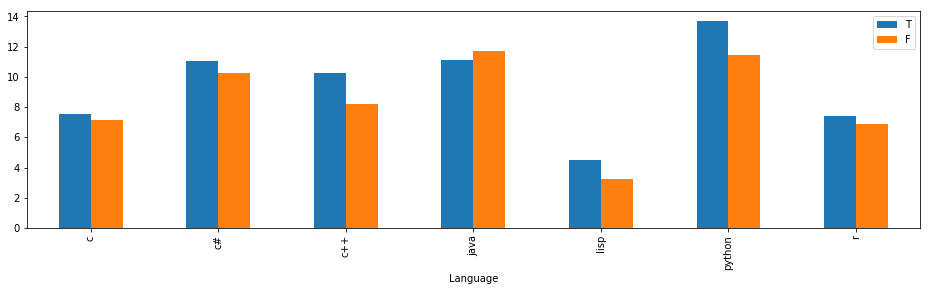

In [110]:
answer_comparison_TF.plot(kind="bar", figsize=(16,4))

In seems that in most cases, the Thinkers are better at answering questions than feelers, with the possible exception of Java. 

### Juding vs. Perciving

In [111]:
answer_comparison_JP = pd.DataFrame()

In [112]:
answer_comparison_JP["PSum"] = answer_data_summed["ESFP"] + \
                            answer_data_summed["ESTP"] + \
                            answer_data_summed["ENFP"] + \
                            answer_data_summed["ENTP"] + \
                            answer_data_summed["ISFP"] + \
                            answer_data_summed["ISTP"] + \
                            answer_data_summed["INFP"] + \
                            answer_data_summed["INTP"]

In [113]:
answer_comparison_JP["JSum"] = answer_data_summed["ESFJ"] + \
                            answer_data_summed["ESTJ"] + \
                            answer_data_summed["ENFJ"] + \
                            answer_data_summed["ENTJ"] + \
                            answer_data_summed["ISFJ"] + \
                            answer_data_summed["ISTJ"] + \
                            answer_data_summed["INFJ"] + \
                            answer_data_summed["INTJ"]

In [114]:
answer_comparison_JP["PCount"] = answer_data_count["ESFP"] + \
                            answer_data_count["ESTP"] + \
                            answer_data_count["ENFP"] + \
                            answer_data_count["ENTP"] + \
                            answer_data_count["ISFP"] + \
                            answer_data_count["ISTP"] + \
                            answer_data_count["INFP"] + \
                            answer_data_count["INTP"]

In [115]:
answer_comparison_JP["JCount"] = answer_data_count["ESFJ"] + \
                            answer_data_count["ESTJ"] + \
                            answer_data_count["ENFJ"] + \
                            answer_data_count["ENTJ"] + \
                            answer_data_count["ISFJ"] + \
                            answer_data_count["ISTJ"] + \
                            answer_data_count["INFJ"] + \
                            answer_data_count["INTJ"]

In [116]:
answer_comparison_JP["J"] = answer_comparison_JP["JSum"] / answer_comparison_JP["JCount"]
answer_comparison_JP["P"] = answer_comparison_JP["PSum"] / answer_comparison_JP["PCount"]

In [117]:
del answer_comparison_JP["JSum"]
del answer_comparison_JP["PSum"]
del answer_comparison_JP["JCount"]
del answer_comparison_JP["PCount"]

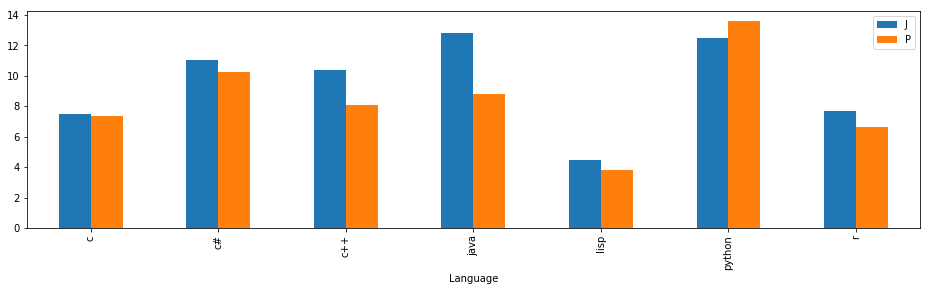

In [118]:
answer_comparison_JP.plot(kind="bar", figsize=(16,4))

Here it seems again, that in most cases the judgers are better than perciviers, even if in some cases (C) the difference is minimal. The only exception this time is Python.

### Python and Extroversion and Introversion

Visually the biggest difference seems to be between the extraverts and introverts in the Python language. Let us not check this with some statistics. 

First let us clean the data somehow.

In [119]:
answer_data["BodyLen"] = answer_data["Body"].apply(lambda a: len(a))

In [120]:
python_data = answer_data.loc[answer_data["Language"] == "python"]

In [121]:
del python_data["OwnerUserId"]
del python_data["CreationDate"]
del python_data["Language"]

In [122]:
python_data["QuestionsMBTI"] = python_data["QuestionsMBTI"].apply(lambda a: a[0])
python_data["AnswerMBTI"] = python_data["AnswerMBTI"].apply(lambda a: a[0])

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [123]:
del python_data["Body"]

In [124]:
python_data["AnswerScore"] = python_data["Score"]
del python_data["Score"]

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
python_data.head()

,ParentId,QuestionsMBTI,AnswerMBTI,BodyLen,AnswerScore
Id,,,,,
11074,11060,E,I,623,8
11128,11060,E,I,163,0
11235,11060,E,I,643,0
11443,11060,E,I,710,4
70778,11060,E,I,500,0


In [126]:
python_data["SameType"] = python_data["QuestionsMBTI"] == python_data["AnswerMBTI"]

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [127]:
python_data.head()

,ParentId,QuestionsMBTI,AnswerMBTI,BodyLen,AnswerScore,SameType
Id,,,,,,
11074,11060,E,I,623,8,False
11128,11060,E,I,163,0,False
11235,11060,E,I,643,0,False
11443,11060,E,I,710,4,False
70778,11060,E,I,500,0,False


Next we are going to create a linear model, where we will also add the control variables, to see if the type is really responsible for the better scores. I am expecially worried about the length of the answer.

In [128]:
lm_model = smf.ols(formula='AnswerScore ~ BodyLen + QuestionsMBTI + AnswerMBTI + SameType', data=python_data).fit()

In [129]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AnswerScore   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.013
Date:                Thu, 04 May 2017   Prob (F-statistic):            0.00301
Time:                        22:44:39   Log-Likelihood:                -13267.
No. Observations:                2442   AIC:                         2.654e+04
Df Residuals:                    2437   BIC:                         2.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.7281      2.586      5.696      0.000       9.658      19.799
QuestionsMBTI[T.I]    -1.7524      2.418     -0.725      0.469      -6.495       2.990
AnswerMBTI[T.I]       -5.7652      2.417     -2.385      0.017     -10.506      -1.025
SameType[T.True]       0.2232      2.419      0.092      0.926      -4.520       4.966
BodyLen                0.0053      0.002      3.119      0.002       0.002       0.009
==============================================================================
Omnibus:                     4625.268   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7897404.615
Skew:                          14.204   Prob(JB):                         0.00
Kurtosis:                     280.144   Cond. No.                     2.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While the length of the text seems to be a much better predictor, whenever the person is extroverted or an introverted also plays the role in what score does it gets.

## Length of Answers

Next we are going to analyze the length of the post by different langauges and type.

In [130]:
data_length_answers = answer_data.copy()

In [131]:
data_length_answers = data_length_answers.groupby(["AnswerMBTI", "Language"], as_index=False)["BodyLen"].mean()
data_length_answers = data_length_answers.pivot(index='Language', columns='AnswerMBTI', values='BodyLen')

In [132]:
data_length_answers.head()

AnswerMBTI,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Language,,,,,,,,,,,,,,,,
c,433.016393,578.730769,648.780347,601.062500,566.663415,566.244898,589.254098,421.729412,483.252137,510.462585,823.343158,542.581281,604.017857,333.983871,682.780193,387.468966
c#,453.589286,505.764706,652.317269,708.144928,519.328729,581.764706,545.880597,387.868687,415.375661,451.496183,875.497596,696.420705,553.958333,248.543860,641.120393,433.005051
c++,535.326923,595.566667,630.655000,530.409836,587.100806,588.707317,629.041667,412.955056,392.865116,436.121429,922.207900,528.082353,574.577586,382.383333,739.191667,396.612500
java,607.263158,499.428571,715.210046,837.973684,596.043956,488.032258,477.051948,465.315068,366.480392,451.639535,937.624650,667.522727,525.791667,267.375000,786.840295,434.220096
lisp,800.214286,408.000000,787.875000,942.931818,693.956522,446.631579,666.953488,610.125000,393.970588,445.288462,1112.745192,786.730159,601.347826,691.277778,828.054054,488.169492


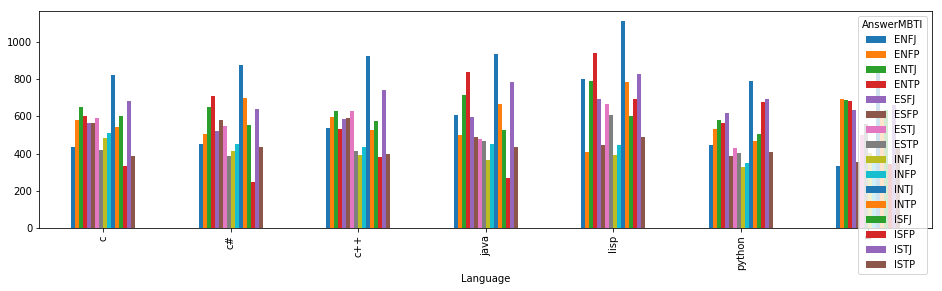

In [133]:
data_length_answers.plot(kind="bar", figsize=(16,4))

There are visible differences between types. But there does not seems like there is any interesting differences between languages.